## Intro

Roma play Feyenoord and the winner of this game gets to lift the Europa Conference league title. 
I analyzed some stats from both teams.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
 
%matplotlib inline

sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# read the csv file into a variable
roma_df = pd.read_csv('roma.csv')

In [3]:
#Check the data
roma_df

,match_day,shots_on,shots_off,goal_for,goal_against,result,corner,possession,pass_accuracy,w,d,l
0,1,7,9,5,1,W,5,62,86,1.0,NaN,NaN
1,2,2,10,3,0,W,5,46,77,1.0,NaN,NaN
2,3,2,4,1,6,L,3,46,84,NaN,NaN,1.0
3,4,4,16,2,2,D,13,55,81,NaN,1.0,NaN
4,5,9,10,4,0,W,8,54,87,1.0,NaN,NaN
5,6,5,3,3,2,W,7,51,83,1.0,NaN,NaN
6,7,3,3,1,0,W,4,38,64,1.0,NaN,NaN
7,8,1,17,1,1,D,5,37,75,NaN,1.0,NaN
8,9,4,10,1,2,L,7,42,78,NaN,NaN,1.0
9,10,9,9,4,0,W,5,39,82,1.0,NaN,NaN


In [4]:
# view results for the last 5 matches
roma_df.result.tail(5)

7     D
8     L
9     W
10    D
11    W
Name: result, dtype: object

In [5]:
# set a new index for the dataframe
roma_df.set_index('match_day', inplace=True)

In [6]:
# get basic statistics of the dataframe like mean
roma_df.describe()

,shots_on,shots_off,goal_for,goal_against,corner,possession,pass_accuracy,w,d,l
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,7.0,3.0,2.0
mean,4.333333,8.333333,2.250000,1.250000,5.916667,44.833333,78.166667,1.0,1.0,1.0
std,2.708013,4.867953,1.484771,1.712255,3.028901,9.123729,7.068925,0.0,0.0,0.0
min,1.000000,2.000000,1.000000,0.000000,1.000000,32.000000,64.000000,1.0,1.0,1.0
25%,2.000000,3.750000,1.000000,0.000000,4.750000,37.750000,74.000000,1.0,1.0,1.0
50%,4.000000,9.000000,1.500000,1.000000,5.000000,44.000000,79.500000,1.0,1.0,1.0
75%,5.500000,10.000000,3.250000,2.000000,7.250000,51.750000,83.250000,1.0,1.0,1.0
max,9.000000,17.000000,5.000000,6.000000,13.000000,62.000000,87.000000,1.0,1.0,1.0


In [7]:
# get the total wins, loss and draws
win_draw_loss_counts_roma = roma_df['result'].value_counts()

In [8]:
win_draw_loss_counts_roma

W    7
D    3
L    2
Name: result, dtype: int64

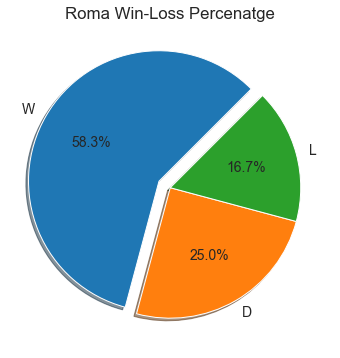

In [9]:
# plot a pie chart of the win, loss and draw

plt.figure(figsize=(12,6))
plt.title('Roma Win-Loss Percenatge')

explode = (0.1, 0, 0)
plt.pie(win_draw_loss_counts_roma,explode=explode, labels=win_draw_loss_counts_roma.index, 
        autopct='%1.1f%%', shadow=True, startangle=45);

## Option 2
Enter the values manually and assign them to variables. Then plot a pie chart

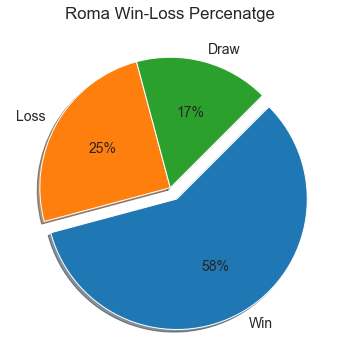

In [14]:

labels = ('Win','Loss', 'Draw')
sizes = [7, 3, 2]

explode = (0.1, 0, 0)

plt.figure(figsize=(9,6))
plt.title('Roma Win-Loss Percenatge')
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%', shadow=True, counterclock=False, startangle=45,);

In [30]:
# get the total shots on target
shots_on_total = roma_df.shots_on.sum()
shots_on_total

52

In [32]:
# get the total shots off target

shots_off_total = roma_df.shots_off.sum()
shots_off_total

100

In [25]:
# get the total attempts
total_attempts_roma = roma_df.shots_on.sum() + roma_df.shots_off.sum()

In [26]:
total_attempts_roma

152

In [28]:
# get total goals scored
total_goals_roma = roma_df.goal_for.sum()
total_goals_roma

27

In [29]:
# get total goals conceded
total_goals_conceded_roma = roma_df.goal_against.sum()
total_goals_conceded_roma

15

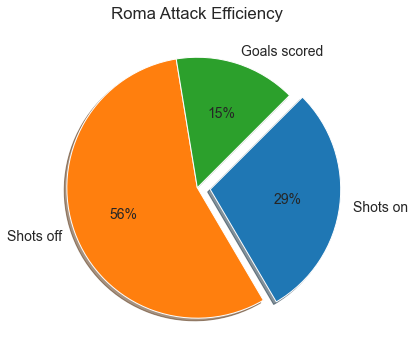

In [85]:
# Plot a pie chart for attack efficiency using the values we got from the calculation carried out above

labels = ('Shots on', 'Shots off', 'Goals scored')
sizes = [52, 100, 27]

explode = (0.1, 0, 0)

plt.figure(figsize=(9,6))
plt.title('Roma Attack Efficiency')
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%', shadow=True, counterclock=False, startangle=45,);

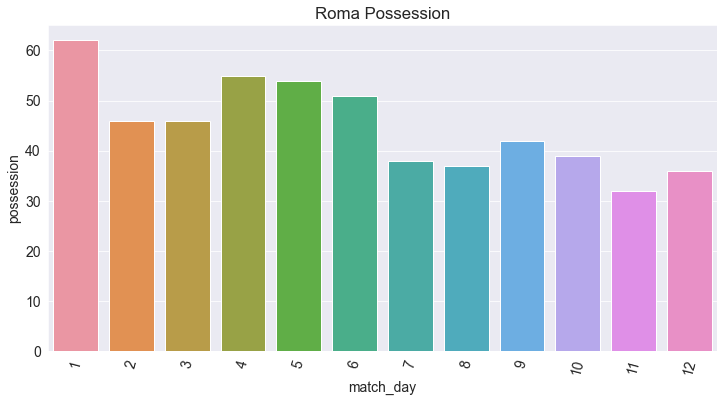

In [43]:
#bar chart of possession across all 12 match days

plt.figure(figsize=(12, 6))

plt.title('Roma Possession')
plt.xticks(rotation=75)



sns.barplot(x=roma_df.index, y=roma_df.possession);

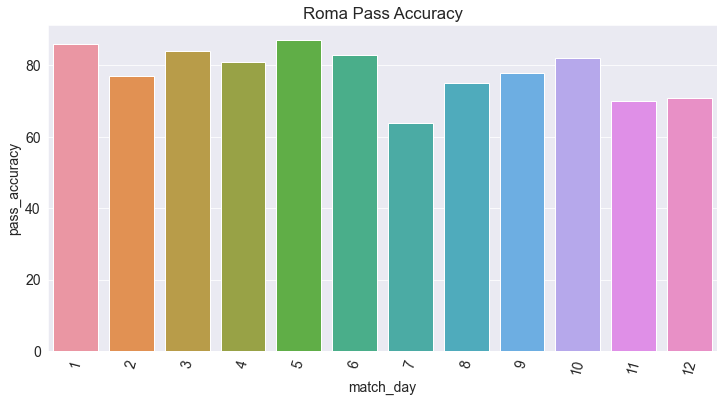

In [44]:
# bar chart for passing accuracy

plt.figure(figsize=(12, 6))

plt.title('Roma Pass Accuracy')
plt.xticks(rotation=75)



sns.barplot(x=roma_df.index, y=roma_df.pass_accuracy);

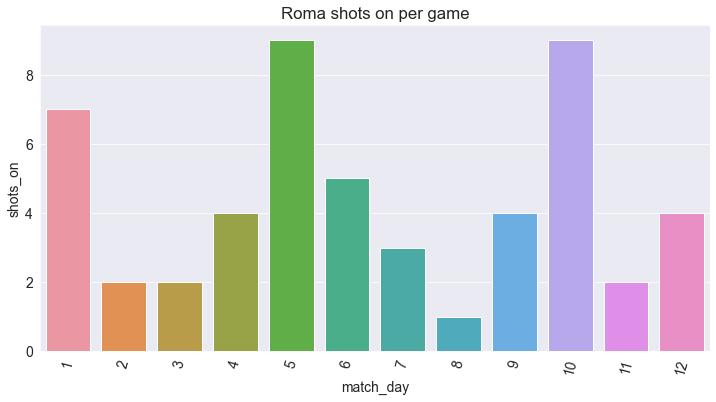

In [83]:
# bar chart for shot accuracy

plt.figure(figsize=(12, 6))

plt.title('Roma shots on per game')
plt.xticks(rotation=75)



sns.barplot(x=roma_df.index, y=roma_df.shots_on);

In [17]:
# read the csv file into a variable

feyenoord_df = pd.read_csv('feyenoord.csv')

In [18]:
#Check the data
feyenoord_df

,match_day,shots_on,shots_off,goal_for,goal_against,result,corner,possession,pass_accuracy,w,d,l
0,1,4,12,0,0,D,4,52,79,NaN,1.0,NaN
1,2,5,7,2,1,W,7,44,74,1.0,NaN,NaN
2,3,11,10,3,1,W,7,54,79,1.0,NaN,NaN
3,4,7,6,2,1,W,6,57,79,1.0,NaN,NaN
4,5,5,3,2,2,D,3,39,65,NaN,1.0,NaN
5,6,10,9,2,1,W,9,60,84,1.0,NaN,NaN
6,7,8,19,5,2,W,5,62,85,1.0,NaN,NaN
7,8,6,11,3,1,W,3,64,89,1.0,NaN,NaN
8,9,6,9,3,3,D,4,56,78,NaN,1.0,NaN
9,10,6,6,3,1,W,4,41,67,1.0,NaN,NaN


In [19]:
# view results for the last 5 matches

feyenoord_df.result.tail(5)

7     W
8     D
9     W
10    W
11    D
Name: result, dtype: object

In [20]:
# get basic statistics of the dataframe like mean
feyenoord_df.describe()

,match_day,shots_on,shots_off,goal_for,goal_against,corner,possession,pass_accuracy,w,d,l
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,8.0,4.0,0.0
mean,6.500000,6.333333,8.833333,2.333333,1.250000,5.000000,50.416667,77.916667,1.0,1.0,NaN
std,3.605551,2.348436,4.041452,1.370689,0.866025,2.044949,9.894519,7.166314,0.0,0.0,NaN
min,1.000000,3.000000,3.000000,0.000000,0.000000,2.000000,36.000000,65.000000,1.0,1.0,NaN
25%,3.750000,5.000000,6.750000,2.000000,1.000000,3.750000,40.750000,73.750000,1.0,1.0,NaN
50%,6.500000,6.000000,8.000000,2.500000,1.000000,4.500000,53.000000,79.000000,1.0,1.0,NaN
75%,9.250000,7.250000,10.250000,3.000000,2.000000,6.250000,57.750000,83.250000,1.0,1.0,NaN
max,12.000000,11.000000,19.000000,5.000000,3.000000,9.000000,64.000000,89.000000,1.0,1.0,NaN


In [21]:
# set a new index for the dataframe
feyenoord_df.set_index('match_day', inplace=True)

In [22]:
feyenoord_df

,shots_on,shots_off,goal_for,goal_against,result,corner,possession,pass_accuracy,w,d,l
match_day,,,,,,,,,,,
1,4,12,0,0,D,4,52,79,NaN,1.0,NaN
2,5,7,2,1,W,7,44,74,1.0,NaN,NaN
3,11,10,3,1,W,7,54,79,1.0,NaN,NaN
4,7,6,2,1,W,6,57,79,1.0,NaN,NaN
5,5,3,2,2,D,3,39,65,NaN,1.0,NaN
6,10,9,2,1,W,9,60,84,1.0,NaN,NaN
7,8,19,5,2,W,5,62,85,1.0,NaN,NaN
8,6,11,3,1,W,3,64,89,1.0,NaN,NaN
9,6,9,3,3,D,4,56,78,NaN,1.0,NaN


In [23]:
# get the total wins, loss and draws
win_draw_loss_counts_fd = feyenoord_df['result'].value_counts()

In [24]:
# see the results
win_draw_loss_counts_fd

W    8
D    4
Name: result, dtype: int64

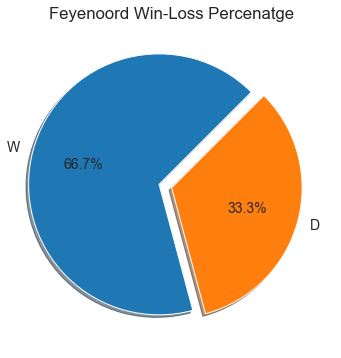

In [31]:
# plot a pie chart of the win, loss and draw

plt.figure(figsize=(12,6))
plt.title('Feyenoord Win-Loss Percenatge')

explode = (0.1, 0)
plt.pie(win_draw_loss_counts_fd,explode=explode, labels=win_draw_loss_counts_fd.index, 
        autopct='%1.1f%%', shadow=True, startangle=45);

## Option 2
Enter the values manually and assign them to variables. Then plot a pie chart

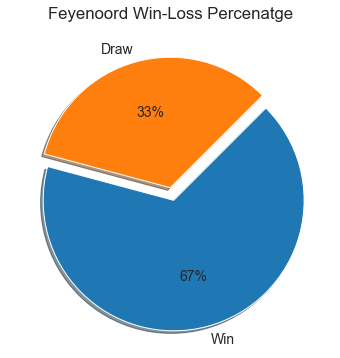

In [26]:
labels = ('Win', 'Draw')
sizes = [8, 4]

explode = (0.1, 0)

plt.figure(figsize=(9,6))
plt.title('Feyenoord Win-Loss Percenatge')
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%', shadow=True, counterclock=False, startangle=45,);

In [27]:
# get the total shots on target
shots_on_total = feyenoord_df.shots_on.sum()
shots_on_total

76

In [28]:
# get the total shots off target
shots_off_total = feyenoord_df.shots_off.sum()
shots_off_total

106

In [29]:
# get the total attempts
total_attempts_feyenoord = feyenoord_df.shots_on.sum() + feyenoord_df.shots_off.sum()
total_attempts_feyenoord

182

In [30]:
# get total goals scored
total_goals_feyenoord = feyenoord_df.goal_for.sum()
total_goals_feyenoord

28

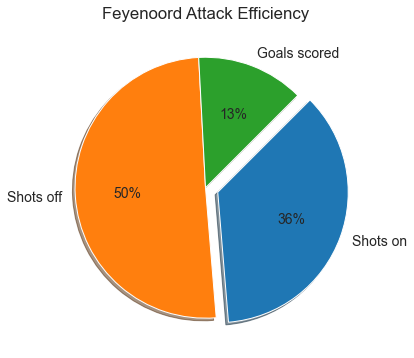

In [32]:
# Plot a pie chart for attack efficiency using the values we got from the calculation carried out above

labels = ('Shots on', 'Shots off', 'Goals scored')
sizes = [76, 106, 28]

explode = (0.1, 0, 0)

plt.figure(figsize=(9,6))
plt.title('Feyenoord Attack Efficiency')
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.f%%', shadow=True, counterclock=False, startangle=45,);

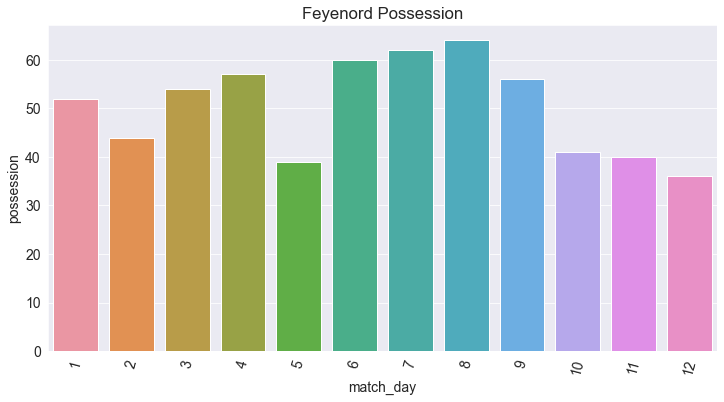

In [33]:
#bar chart of possession across all 12 match days
plt.figure(figsize=(12, 6))

plt.title('Feyenord Possession')
plt.xticks(rotation=75)



sns.barplot(x=feyenoord_df.index, y=feyenoord_df.possession);

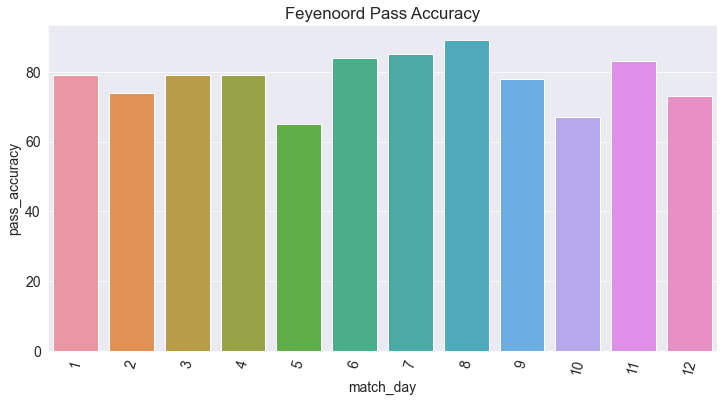

In [34]:
# bar chart for passing accuracy

plt.figure(figsize=(12, 6))

plt.title('Feyenoord Pass Accuracy')
plt.xticks(rotation=75)


sns.barplot(x=feyenoord_df.index, y=feyenoord_df.pass_accuracy);

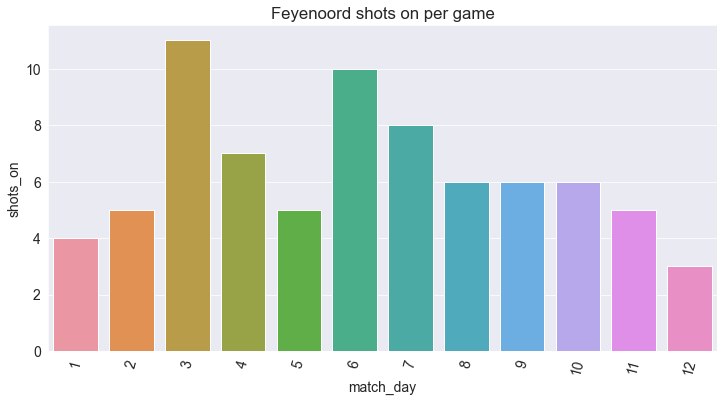

In [35]:
# bar chart for shot accuracy

plt.figure(figsize=(12, 6))

plt.title('Feyenoord shots on per game')
plt.xticks(rotation=75)



sns.barplot(x=feyenoord_df.index, y=feyenoord_df.shots_on);

We want to add a logo to the dashboard we want to create below

In [36]:
from PIL import Image

In [37]:
img = Image.open('sportee data logo twitter profile pic opt 3.png')

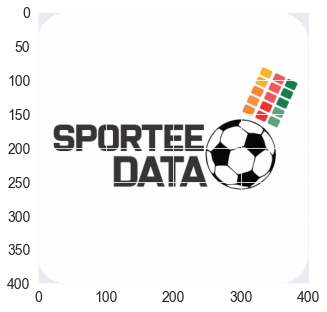

In [38]:
plt.imshow(img);

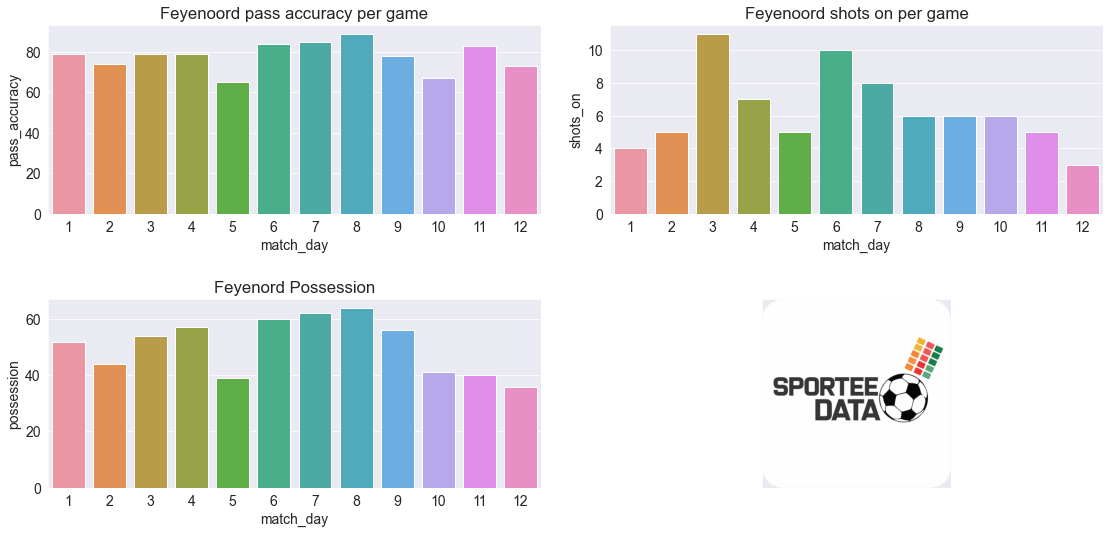

In [40]:
# creating a dashboard for Feyenoord

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes[0,0].set_title('Feyenoord pass accuracy per game')
sns.barplot(x=feyenoord_df.index, y=feyenoord_df.pass_accuracy, ax=axes[0,0])

axes[0,1].set_title('Feyenoord shots on per game')
sns.barplot(x=feyenoord_df.index, y=feyenoord_df.shots_on, ax=axes[0,1])

axes[1,0].set_title('Feyenord Possession')
sns.barplot(x=feyenoord_df.index, y=feyenoord_df.possession, ax=axes[1,0])

axes[1,1].set_title('')
axes[1,1].imshow(img)
axes[1,1].grid(False)
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

plt.tight_layout(pad=2);

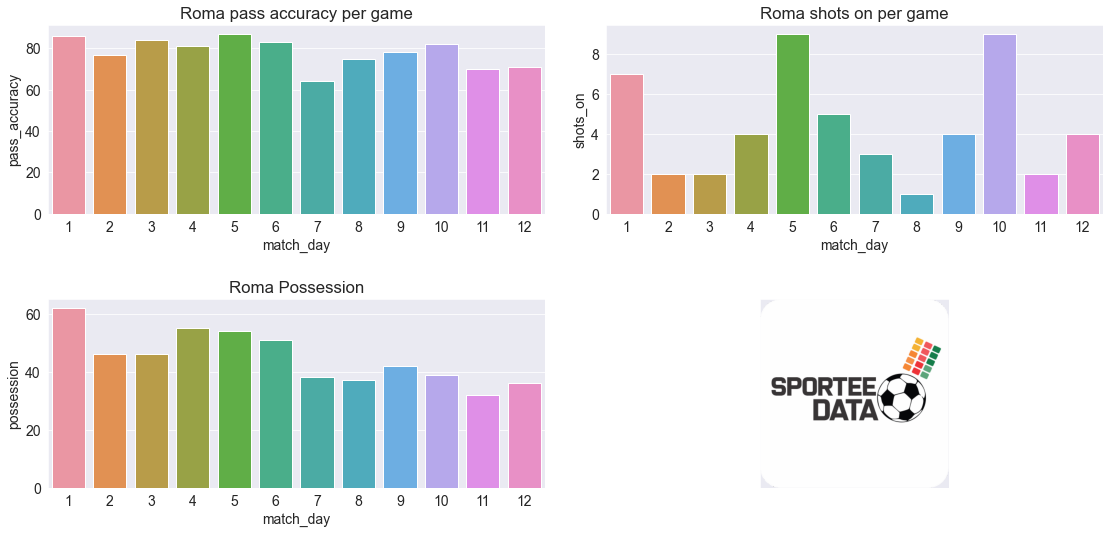

In [41]:
# creating a dashboard for Roma

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes[0,0].set_title('Roma pass accuracy per game')
sns.barplot(x=roma_df.index, y=roma_df.pass_accuracy, ax=axes[0,0])

axes[0,1].set_title('Roma shots on per game')
sns.barplot(x=roma_df.index, y=roma_df.shots_on, ax=axes[0,1])

axes[1,0].set_title('Roma Possession')
sns.barplot(x=roma_df.index, y=roma_df.possession, ax=axes[1,0])

axes[1,1].set_title('')
axes[1,1].imshow(img)
axes[1,1].grid(False)
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

plt.tight_layout(pad=2);

## Conclusion


Roma are not a possession based team. They attempted 52 shots on target scoring 27 goals. This means they are highly efficient with the chances they create.

Feyenoord are yet to loose in this competition. 76 shots on target and just 28 goals means they are not very efficient with their chances.